## Team Member :
### Hammam Abdelwahab
### Najlae Lemrabet
### Hatim Jamali

## Instructions

1. Read chapter 2 from Haykin’s book until 2.13 (leaving out Statistical learning theory to end of chapter) and summarize or sketch your insights in mind-map or an outline or a summary. [4 points]

The mind map is as follows (seperate image will be uploaded separately): 
<img src="LearningProcesses.png">

 2. Write down 3 questions and their brief answers on the reading material. [2 Points]

#### 1-For memory-based learning algorithms there are two essential ingredients, mention them?
- Criterion used for defining the local neighborhood of the test vector xtest
- Learning rule applied to the training examples in the local neighborhood of xtest

#### 2-what are the four key mechanisms (properties) that characterize a Hebbian synapse?
   * Time-dependent mechanism
   * Local mechanism
   * Interactive mechanism
   * Conjunctional or correlational mechanism
   
#### 3-what are different Learning Tasks?
   * Pattern Association
   * Pattern Recognition
   * Function Approximation
   * Control
   * Filtering
   * Beamforming

3. Do the problem 1.13 (Network architecture) from the previous week’s assignment again by visualising the output of the neuron using 3d view. Assume the network presented in fig P1.13 is a binary-classifier, please depict how the input space (R2) is classified on a 3D graph using different colors. [8 points] 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


<IPython.core.display.Javascript object>


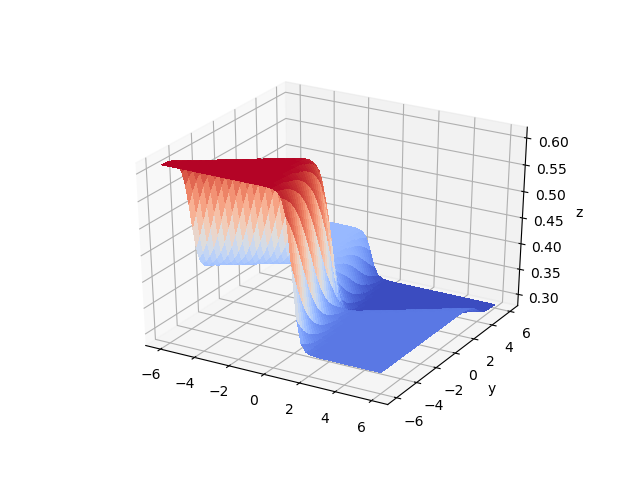

<IPython.core.display.Javascript object>


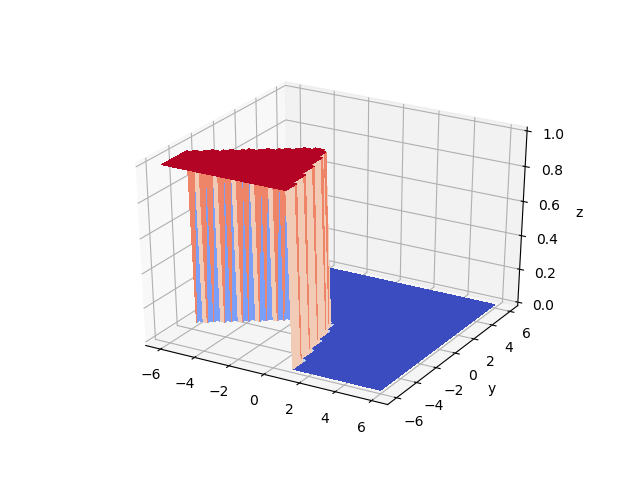

In [12]:
# YOUR CODE HERE
%matplotlib notebook

import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def sig(x): 
    return (1 / (1+np.exp(-x)))

def binary_classifier(Y):
    for k,j in enumerate(Y):
        for i,o in enumerate(j):
            #threshold set to be 0.5 
            if o>= 0.5: 
                j[i] = 1 
            else: 
                j[i] = 0 
    #plot the graph 
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,linewidth=0, antialiased=False)


    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

    
x1 = np.linspace(-6, 6)
x2 = np.linspace(-6, 6)

X1, X2 = np.meshgrid(x1, x2)

Y = sig(-2*sig(3*sig(5*X1 + X2) - sig(2*X1 - 3*X2)) \
        + sig(4*sig(5*X1 + X2) + 6*sig(2*X1 - 3*X2)))

fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

#depict Y as a binary classifier 
binary_classifier(Y)
#raise NotImplementedError()

4. Adjust the data at the "New Classification Example (now *with* bias)" slide, such that a bais becomes necessary (not 0). Validate the perceptron learning algorithm. [8 points]

In [ ]:
import numpy

('epoch : ', 1)
[-1  2  0]
('epoch : ', 2)
[ 0  2 -1]
('epoch : ', 3)
[ 0  2 -1]
('w=', array([ 0,  2, -1]))


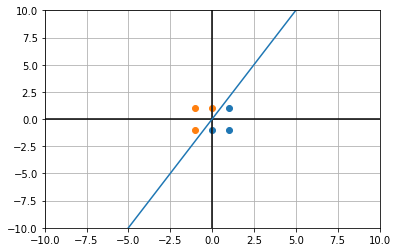

('epoch : ', 1)
[0 2 0]
('epoch : ', 2)
[ 1  2 -1]
('epoch : ', 3)
[ 1  2 -1]
('w=', array([ 1,  2, -1]))


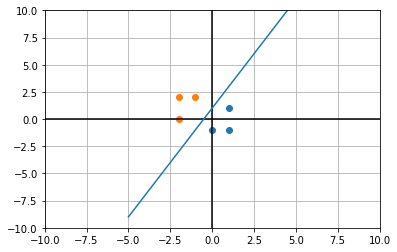

In [2]:
# YOUR CODE HERE
def plot_origin():
    plt.plot([-10,10],[0,0],color="black")
    plt.plot([0,0],[-10,10],color="black")

def update_weight(lr,x,w):
    
    if x.dot(w) <= 0: 
        
        return w +lr*x
    else: 
        return w  
       
def training(weight):
    x1 = np.linspace(-5,5,10)
    x2 = np.linspace(-5,5,10)
    k = 1 
    old_weight=np.array((0,0,0))
    while(not (weight==old_weight).all()):
        old_weight=weight
        for i in pattern: 
            weight = update_weight(lr,i,weight)
            #print(weight)
        print("epoch : ",k)
        print(weight)
        k += 1
        
        
        
    return weight   


def plot_desicion_line(c1,c2,weight): 
    
    plot_origin()
    a1,b1 = zip(*c1)
    a,b = zip(*c2)

    plt.scatter(a1,b1)
    plt.scatter(a,b)
    
    
    
    x1 = np.linspace(-5,5,num=10)
    x2 = np.linspace(-5,5,num=10)
    y = weight[0]+weight[1]*x1 
 
    
    plt.plot(x1,y)
    plt.grid()
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.show()
    
# before update plot:    
c1 = np.array([(1,1,1),(1,1,-1),(1,0,-1)])
c2 = np.array([(-1,1,1),(-1,1,-1),(-1,0,-1)])
pattern = np.vstack((c1,c2))
lr = 1

weight = np.array((1,0,0))
weight = training(weight)

c1_plot = np.array([[1,1],[1,-1],[0,-1]])
c2_plot = np.array([[-1,-1],[-1,1],[0,1]])
print("w=",weight)
plot_desicion_line(c1_plot,c2_plot,weight)

#After the updated plot
# shift x axis +1 
# shift y axis -1
c1 = np.array([(1,1,1),(1,1,-1),(1,0,-1)])
c2 = np.array([(-1,2,0),(-1,2,-2),(-1,1,-2)])
pattern = np.vstack((c1,c2))
lr = 1

weight = np.array((1,0,0))
weight = training(weight)

c1_plot = np.array([[1,1],[1,-1],[0,-1]])
c2_plot = np.array([[-2,0],[-2,2],[-1,2]])
print("w=",weight)
plot_desicion_line(c1_plot,c2_plot,weight)

5. Program the perceptron learning algorithm as binary classifier in Python. Define two functions: learn_pecptron and evaluate_perceptron. The learn_pecptron function are learning rate, positive and negative data.[8 points]

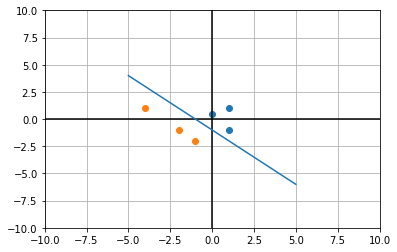

In [4]:
# YOUR CODE HERE

def evaluate_perceptron(weight):
    plot_origin()
    a1,b1 = zip(*c1)
    a,b = zip(*c2)

    plt.scatter(a1,b1)
    plt.scatter(a,b)

    x1 = np.linspace(-5,5,num=10)
    x2 = np.linspace(-5,5,num=10)
    y = weight[1] + weight[0]*x1

    plt.plot(x1,y)
    plt.grid()
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    
def plot_origin():
    plt.plot([-10,10],[0,0],color="black")
    plt.plot([0,0],[-10,10],color="black")
    
    
def learn_perceptron(c1,c2,lr,desired,w): 
    c = np.vstack((c1,c2))
    for i,j in enumerate(c):
        y = w.T.dot(j)

        if desired[i] - y > 0: 
            w += lr*j 
        elif desired[i] - y < 0: 
            w -=lr*j 

        else: 
            pass 
    
    return w 

        
def plot_origin():
    plt.plot([-10,10],[0,0],color="black")
    plt.plot([0,0],[-10,10],color="black")
    
           
c1 = np.array([(1,1),(1,-1),(0,-1)])
c2 = np.array([(2,0),(1,-2),(1,-2)])
lr = 1 

desired = np.array([1,1,1,0,0,0])

w = np.array([0,0])
h = 1 
while h <= 4: 
    w=learn_perceptron(c1,c2,lr,desired,w)
    h += 1
    
    
c1 = np.array([[1,1],[1,-1],[0,0.5]])
c2 = np.array([[-2,-1],[-4,1],[-1,-2]])

evaluate_perceptron(w)

plt.show()
